# Multiple Linear Regression 

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing Data Set

In [6]:
dataset = pd.read_csv('../Covid_data Multiple Linear Regr.csv')
display(dataset)


,age,Body Temp,Chronic disease,Blood O2 Level in Percentage,Anti Bodies
0,10,Moderate,0,97,127181
1,80,High,0,92,61004
2,10,Low,0,97,111911
3,81,High,4,75,39010
4,12,Moderate,0,97,110911
...,...,...,...,...,...
65,76,High,4,80,39010
66,35,Moderate,0,92,91141
67,13,Moderate,0,94,112101
68,82,High,3,73,42010


## Checking Data

In [9]:
dataset.duplicated().sum()

1

In [10]:
dataset.drop_duplicates(keep='first')

,age,Body Temp,Chronic disease,Blood O2 Level in Percentage,Anti Bodies
0,10,Moderate,0,97,127181
1,80,High,0,92,61004
2,10,Low,0,97,111911
3,81,High,4,75,39010
4,12,Moderate,0,97,110911
...,...,...,...,...,...
65,76,High,4,80,39010
66,35,Moderate,0,92,91141
67,13,Moderate,0,94,112101
68,82,High,3,73,42010


In [11]:
dataset.nunique()

age                             51
Body Temp                        3
Chronic disease                  5
Blood O2 Level in Percentage    27
Anti Bodies                     67
dtype: int64

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           70 non-null     int64 
 1   Body Temp                     70 non-null     object
 2   Chronic disease               70 non-null     int64 
 3   Blood O2 Level in Percentage  70 non-null     int64 
 4   Anti Bodies                   70 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.9+ KB


In [14]:

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Encoding categorical data

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
print(X)

[[0.0 0.0 1.0 10 0 97]
 [1.0 0.0 0.0 80 0 92]
 [0.0 1.0 0.0 10 0 97]
 [1.0 0.0 0.0 81 4 75]
 [0.0 0.0 1.0 12 0 97]
 [0.0 1.0 0.0 18 0 66]
 [0.0 0.0 1.0 13 0 93]
 [1.0 0.0 0.0 94 4 64]
 [1.0 0.0 0.0 86 2 76]
 [0.0 0.0 1.0 20 0 92]
 [0.0 0.0 1.0 15 0 94]
 [0.0 0.0 1.0 15 0 92]
 [0.0 1.0 0.0 16 0 92]
 [0.0 0.0 1.0 17 0 93]
 [0.0 0.0 1.0 18 0 93]
 [0.0 0.0 1.0 19 0 92]
 [0.0 0.0 1.0 19 0 89]
 [0.0 0.0 1.0 12 0 97]
 [0.0 0.0 1.0 20 0 93]
 [0.0 0.0 1.0 24 0 92]
 [0.0 0.0 1.0 25 0 93]
 [1.0 0.0 0.0 59 2 68]
 [1.0 0.0 0.0 63 1 66]
 [0.0 0.0 1.0 25 1 62]
 [1.0 0.0 0.0 26 0 94]
 [0.0 1.0 0.0 26 0 97]
 [0.0 0.0 1.0 28 0 99]
 [1.0 0.0 0.0 59 0 69]
 [0.0 0.0 1.0 28 0 89]
 [0.0 0.0 1.0 29 0 93]
 [0.0 0.0 1.0 48 0 93]
 [0.0 0.0 1.0 30 0 62]
 [0.0 0.0 1.0 30 0 86]
 [0.0 0.0 1.0 32 0 84]
 [0.0 0.0 1.0 34 1 90]
 [0.0 0.0 1.0 35 0 89]
 [1.0 0.0 0.0 50 2 77]
 [1.0 0.0 0.0 56 2 76]
 [1.0 0.0 0.0 56 1 77]
 [1.0 0.0 0.0 36 1 90]
 [1.0 0.0 0.0 38 2 75]
 [0.0 0.0 1.0 40 0 90]
 [1.0 0.0 0.0 40 0 92]
 [1.0 0.0 0

## Splitting into test and training set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [18]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision= 3)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)), 1))

[[ 98523.191  93010.   ]
 [ 65402.264  66019.   ]
 [ 91633.957  91019.   ]
 [ 59006.199  59994.   ]
 [ 83371.86   83891.   ]
 [ 37389.494  46016.   ]
 [ 30993.428  37914.   ]
 [ 61449.821  62001.   ]
 [ 88243.989  90001.   ]
 [ 44653.711  42099.   ]
 [ 60509.248  61018.   ]
 [ 94138.001  93091.   ]
 [ 81045.966  75012.   ]
 [ 87382.408  88012.   ]
 [ 89441.362  90015.   ]
 [ 73918.161  71191.   ]
 [ 45028.695  42010.   ]
 [ 64830.56   67019.   ]
 [ 62066.945  62019.   ]
 [107662.326 110911.   ]
 [ 49277.928  39010.   ]
 [ 66394.372  61082.   ]
 [110895.003 111911.   ]
 [ 76026.676  78004.   ]
 [103591.699 102019.   ]
 [ 43955.278  39010.   ]
 [ 61761.269  62019.   ]
 [ 83187.824  84008.   ]]


## Visualizing results

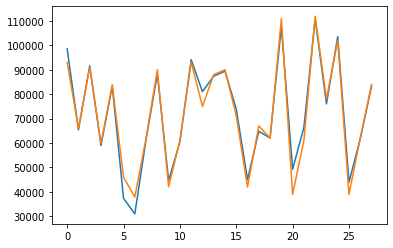

In [32]:
plt.plot(y_pred)
plt.plot(y_test)
plt.show()